In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.models import load_model
import itertools
from sklearn.metrics import classification_report, confusion_matrix
from  sklearn.metrics import precision_recall_fscore_support
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image


Menampilkan akurasi tertinggi semua model

In [2]:
path = 'H:/Skripsi/Research'
os.chdir(path)

for p,n,f in os.walk(os.getcwd()):
    for a in f:
        a = str(a)
        if a.endswith('.csv'):
            path_csv=( p +'\\'+a)

            df = pd.read_csv(path_csv)
            df.rename(columns={"Unnamed: 0": "epoch"}, inplace = True)

            df2 = df["val_accuracy"].max()
            df2_str = str(df2*100)
            print(a + " = "+ str(df2))

MobileNetV3 Large 0.75 DA (freeze).csv = 0.5913333296775818
MobileNetV3 Large 0.75 DA (unfreeze).csv = 0.7406666874885559
MobileNetV3 Large 0.75 TA (freeze).csv = 0.6336666941642761
MobileNetV3 Large 0.75 TA (unfreeze).csv = 0.7116666436195374
MobileNetV3 Large 1.0 DA (freeze).csv = 0.6299999952316284
MobileNetV3 Large 1.0 DA (unfreeze).csv = 0.731333315372467
MobileNetV3 Large 1.0 TA (freeze).csv = 0.6579999923706055
MobileNetV3 Large 1.0 TA (unfreeze).csv = 0.7020000219345093
MobileNetV3 Small 0.75 DA (freeze).csv = 0.5316666960716248
MobileNetV3 Small 0.75 DA (unfreeze).csv = 0.6903333067893982
MobileNetV3 Small 0.75 TA (freeze).csv = 0.5803333520889282
MobileNetV3 Small 0.75 TA (unfreeze).csv = 0.6629999876022339
MobileNetV3 Small 1.0 DA (freeze).csv = 0.5440000295639038
MobileNetV3 Small 1.0 DA (unfreeze).csv = 0.6943333148956299
MobileNetV3 Small 1.0 TA (freeze).csv = 0.606333315372467
MobileNetV3 Small 1.00 TA (unfreeze).csv = 0.67166668176651


Menampilkan rata-rata akurasi semua model

In [3]:
path = 'H:/Skripsi/Research'
os.chdir(path)

for p,n,f in os.walk(os.getcwd()):
    for a in f:
        a = str(a)
        if a.endswith('.csv'):
            path_csv=( p +'\\'+a)

            df = pd.read_csv(path_csv)
            df.rename(columns={"Unnamed: 0": "epoch"}, inplace = True)

            df2 = df["val_accuracy"].mean()
            df2_str = str(df2*100)
            print(a + " = "+ str(df2))

MobileNetV3 Large 0.75 DA (freeze).csv = 0.5583333309491475
MobileNetV3 Large 0.75 DA (unfreeze).csv = 0.6692866657177607
MobileNetV3 Large 0.75 TA (freeze).csv = 0.6107399996121724
MobileNetV3 Large 0.75 TA (unfreeze).csv = 0.6434577777733406
MobileNetV3 Large 1.0 DA (freeze).csv = 0.5986377787590027
MobileNetV3 Large 1.0 DA (unfreeze).csv = 0.6400222194194793
MobileNetV3 Large 1.0 TA (freeze).csv = 0.6365377755959829
MobileNetV3 Large 1.0 TA (unfreeze).csv = 0.6143355553845564
MobileNetV3 Small 0.75 DA (freeze).csv = 0.5023866661389669
MobileNetV3 Small 0.75 DA (unfreeze).csv = 0.6162644443412622
MobileNetV3 Small 0.75 TA (freeze).csv = 0.5526777799924215
MobileNetV3 Small 0.75 TA (unfreeze).csv = 0.5986266653736433
MobileNetV3 Small 1.0 DA (freeze).csv = 0.5154577773809433
MobileNetV3 Small 1.0 DA (unfreeze).csv = 0.6130377789835135
MobileNetV3 Small 1.0 TA (freeze).csv = 0.574811110496521
MobileNetV3 Small 1.00 TA (unfreeze).csv = 0.6040133331716061


menyiapkan data testing

In [4]:
val_data_generator = ImageDataGenerator()

In [5]:
dir = 'emirhan_human_dataset/datasets/human_data/test_data'
valid_generator = val_data_generator.flow_from_directory(dir,
                                                         target_size=(224,224),
                                                         shuffle=False,
                                                         class_mode='categorical',
                                                         batch_size=32,
                                                         )

Found 3000 images belonging to 15 classes.


load model yang telah di training sebelumnya


In [49]:
path_model='H:\Skripsi\Research\MobileNetV3 Large 1.0\MobileNet V3 Large 1.0 TA (unfreeze)\MobileNetV3 Large 1.0 TA (unfreeze).h5'
model = load_model(path_model)


In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3large (Functiona  (None, 1280)             4226432   
 l)                                                              
                                                                 
 sequential (Sequential)     (None, 15)                1123047   
                                                                 
Total params: 5,349,479
Trainable params: 5,325,079
Non-trainable params: 24,400
_________________________________________________________________


confusion matrik function

In [51]:
#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [52]:
def pandas_classification_report(y_true, y_pred):
    metrics_summary = precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred)
    
    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index)
    
    support = class_report_df.loc['support']
    total = support.sum() 
    avg[-1] = total
    
    class_report_df['avg / total'] = avg

    return class_report_df.T

memangil model dan function 

94/94 [==============================] - 120s 1s/step
Classification Report
                    precision    recall  f1-score   support

           calling       0.62      0.68      0.65       200
          clapping       0.62      0.64      0.63       200
           cycling       0.95      0.90      0.92       200
           dancing       0.69      0.76      0.72       200
          drinking       0.66      0.64      0.65       200
            eating       0.81      0.81      0.81       200
          fighting       0.76      0.75      0.75       200
           hugging       0.82      0.64      0.72       200
          laughing       0.70      0.76      0.73       200
listening_to_music       0.79      0.54      0.64       200
           running       0.80      0.77      0.78       200
           sitting       0.43      0.68      0.52       200
          sleeping       0.80      0.68      0.74       200
           texting       0.60      0.60      0.60       200
      using_laptop     

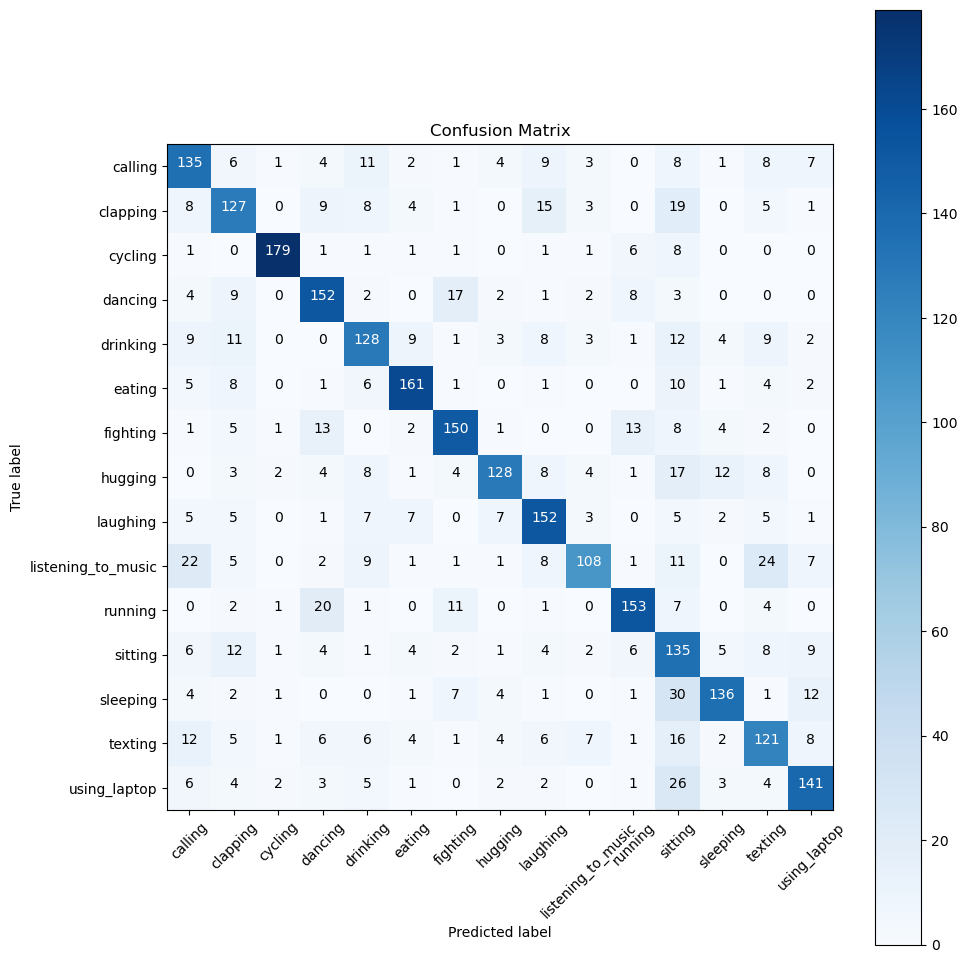

In [53]:
#On test dataset
Y_pred = model.predict(valid_generator)
y_pred = np.argmax(Y_pred, axis=1)
target_names = valid_generator.class_indices

#Confution Matrix
cm = confusion_matrix(valid_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')

#Classification Report
print('Classification Report')
report = classification_report(valid_generator.classes, y_pred, target_names=target_names)
print(report)


menyimpan hasil dari proses sebelumnya ke excel

In [55]:
df_class_report = pandas_classification_report(valid_generator.classes, y_pred)
print(df_class_report)

df_class_report.to_excel("output.xlsx")

             precision  recall  f1-score  support
0             0.619266   0.675  0.645933    200.0
1             0.622549   0.635  0.628713    200.0
2             0.947090   0.895  0.920308    200.0
3             0.690909   0.760  0.723810    200.0
4             0.663212   0.640  0.651399    200.0
5             0.813131   0.805  0.809045    200.0
6             0.757576   0.750  0.753769    200.0
7             0.815287   0.640  0.717087    200.0
8             0.700461   0.760  0.729017    200.0
9             0.794118   0.540  0.642857    200.0
10            0.796875   0.765  0.780612    200.0
11            0.428571   0.675  0.524272    200.0
12            0.800000   0.680  0.735135    200.0
13            0.596059   0.605  0.600496    200.0
14            0.742105   0.705  0.723077    200.0
avg / total   0.719147   0.702  0.705702   3000.0
